In [2]:
import os
import pandas as pd
import json
import datetime

In [27]:
path = "tongsdata/"
filename = "2018-12-23.json"
filedate = filename.split(".")[0].split("-")

with open(path + filename, 'r', encoding='utf-8') as fin:
    data_json = json.loads(fin.read())

#  Create X DataFrame
todayData = {time: data_json[time]['currently'] for time in data_json}
todayData_DF = pd.DataFrame(todayData).T
todayData_DF.index.names=['time_of_day']
todayData_DF = todayData_DF.loc['06:30':'18:00']
todayData_DF = todayData_DF.reset_index()
todayData_DF['month'] = todayData_DF['time'].apply(datetime.datetime.fromtimestamp).apply(lambda x: x.month)
todayData_DF['cloudCover'] = todayData_DF['cloudCover'].fillna(value=todayData_DF['cloudCover'].mean())
todayData_DF = todayData_DF.drop(columns=['icon', 'summary', 'time', 'windBearing', 'windGust'])
todayData_DF = pd.get_dummies(todayData_DF, columns=['time_of_day', 'precipType', 'uvIndex', 'month']) 
todayData_DF.shape
first_predict = todayData_DF.astype('float').values
first_predict

array([[87.5 ,  0.75, 75.18, ...,  0.  ,  0.  ,  1.  ],
       [87.72,  0.75, 75.55, ...,  0.  ,  0.  ,  1.  ],
       [87.94,  0.75, 75.91, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [95.49,  0.29, 71.78, ...,  0.  ,  0.  ,  1.  ],
       [95.33,  0.29, 72.21, ...,  0.  ,  0.  ,  1.  ],
       [95.14,  0.29, 72.63, ...,  0.  ,  0.  ,  1.  ]])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

training_features, testing_features, training_target, testing_target = train_test_split(X, y)

# Average CV score on the training set was:-91867.4890210794
exported_pipeline = RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=7, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
print(mean_squared_error(results, testing_target), 
mean_absolute_error(results, testing_target), 
r2_score(results, testing_target))

In [7]:
todayData_DF.shape

(96, 14)

In [5]:
%matplotlib inline

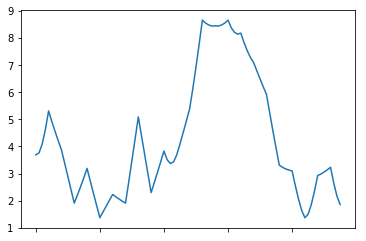

In [7]:
todayData_DF.windSpeed.plot()